# Running simulations of the Foraging Ascomycete Model

Let's try some parameter sweeps with our new model. First, let's compare what happens when two fungi vary in their ability to disperse spores across the landscape, without any endophytic abilites. Our parameter sweep file will look like this:

In [26]:
from FAmodel import Forest
from FAmodel import sumendos
from FAmodel import sumdecomps
from FAagents import Tree, Wood, Fungus
import numpy as np
import matplotlib.pyplot as plt
import thomasprocess as tp
import pickle
%matplotlib inline

In [14]:
blue_runs = {} ## where we'll store the blue fungi's model runs
red_runs = {} ## where we'll store the red fungi's model runs
for i in [ a/10 for a in range(2,22,2) ]: ## levels of variable
    blue_list = []
    red_list = []
    for j in range(100): ## number of simulations per level of parameter
        losced = Forest(endophytism = False, ##settings for model
                        endodisp=1, ## hold one fungus constant...
                        decompdisp=i, ## sweep the other: parameter of interest
                        )
        for j in range(30): losced.step() ## number of steps before ending the model
        ## data into lists
        ## these are functions from MESA's data collection module
        blue_list.append(losced.datacollector.get_model_vars_dataframe().Endophytes)
        red_list.append(losced.datacollector.get_model_vars_dataframe().Decomposers)
    blue_runs[i] = blue_list
    red_runs[i] = red_list

In [ ]:
#pickle.dump(blue_runs, open('sampleBR.p', 'wb'))`
#pickle.dump(red_runs, open('sampleRR.p', 'wb'))

In [31]:
blue_runs = pickle.load(open('sampleBR.p', 'rb'))
red_runs = pickle.load(open('sampleRR.p', 'rb'))

There aren't any endophytes in this scenario. When there are endophyte-capable fungi, we assign them blue, some of the above code reflects this. To visualize a run:

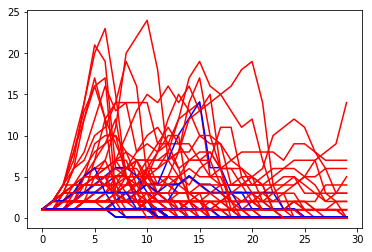

In [15]:
def plot_run(level):
    for i in zip(blue_runs[level], red_runs[level]): ## alternate ('zip') between to make sure both are visible
        plt.plot([ j for j in range(30) ], i[0]+0.1, c='b') ## lift one set (blue) up a little to increase visibility.
        plt.plot([ j for j in range(30) ], i[1], c='r')

plot_run(0.2)

Works. But if we want to plot all the runs, from each level of the parameter sweep:

Well, needs some work. back in a bit. 

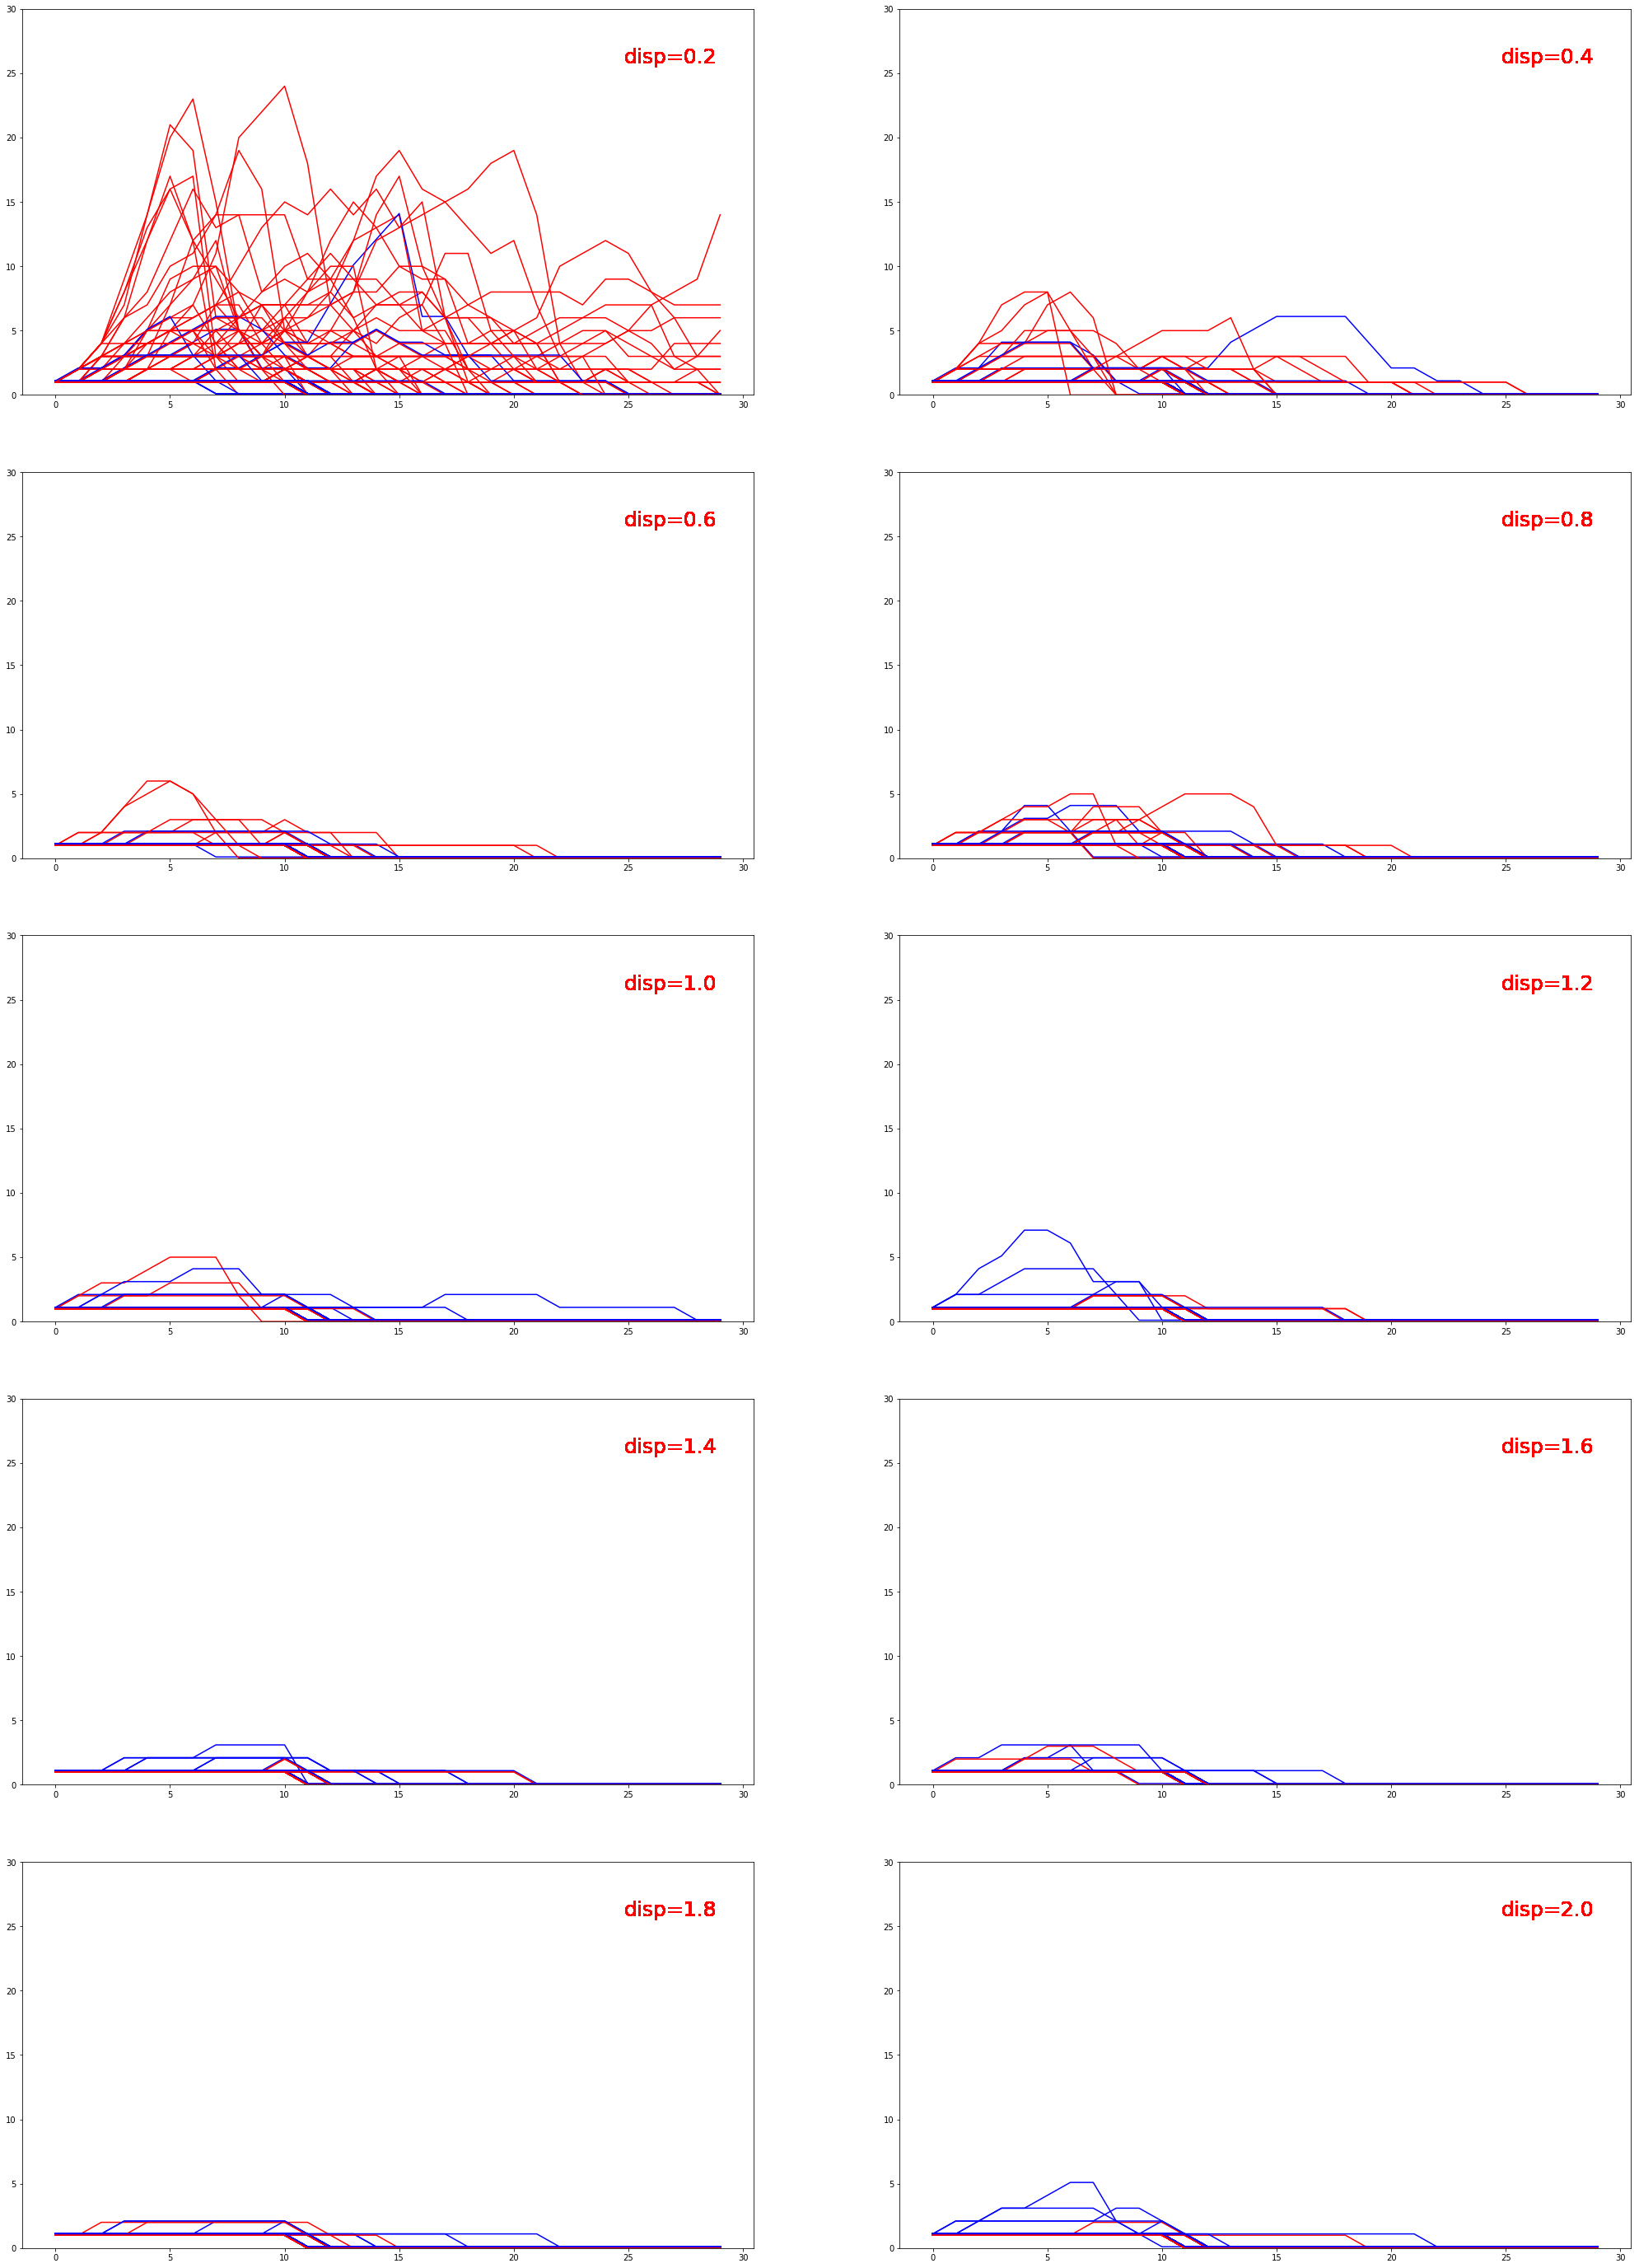

In [41]:
fig, axes = plt.subplots(5,2, figsize=(35, 50))
lvls = sorted(list(blue_runs.keys()))
lvls2 = sorted(list(red_runs.keys()))
for i,z in enumerate(axes.flatten()):
    for j in zip(blue_runs[lvls[i]], red_runs[lvls[i]]):
        z.set_ylim([0, 30])
        z.plot([ h for h in range(30) ], j[0]+0.1, c='b')
        z.plot([ h for h in range(30) ], j[1], c='r')
        z.text(.95, .9, 'disp=%s' % lvls[i],
                color='r',
                size='25',
                horizontalalignment='right',
                verticalalignment='top',
                transform=z.transAxes)
